In [27]:
# jupyter notebook设置同一个cell打印多个结果
from IPython.display import display

# Tips

------------

# Matplotlib基本知识

## matplotlib的一些有用资源
+ [matplotlib->tutorials->usage guide](https://matplotlib.org/tutorials/introductory/usage.html)  
  这个是matplotlib官方的文档，这一部分介绍了matplotlib中的一些基本框架和概念，包括：
  Figure,Axes,Axis,backends,interactive modesl等等。

+ [Anatomy of MatplotlibAnatomy of Matplotlib->Overview of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)  
  这是github上的一个教程文档，以jupyter格式提供，这个对于绘图方式解释的也很清楚。

+ [Matplotlib tutorial](https://www.labri.fr/perso/nrougier/teaching/matplotlib/#figures-subplots-axes-and-ticks)  
  这个对于基本概念也有解释，还不错。

+ [PythonDataScienceHandlebook->Chapter 4.8](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks)  
  这个是2017年新出的书，在github上提供jupyter版，感觉这本书写的很好。
  
+ **[Matplotlib API Overview -> Modules](https://matplotlib.org/api/index.html#modules)**   
  这是Matplotlib包含的所有子模块文档。

## Matplotlib,Pylab和Pyplot

+ `matplotlib` 是整个绘图package；
+ `pyplot`只是`matplotlib`中的一个 module，它提供了一个关于`matplotlib`的**shell-like**接口；
+ `pylab`也是`matplotlib`中的一个 module，它将`pyplot`和`numpy`的**namespace**合成一个，比较方便，但是，**这种方式现在已经不推荐了**。
+ 使用matplotlib 的方法有很多种，最常用的方式是 Pylab 模式下的IPython，这种方式可以在启动 ipython 时，指定如下参数实现：
  `ipython --pylab`
  这样会将 IPython 配置为 使用你所指定的 matplotlib GUI 后端（backend）（Tk,wxPython,PyQt,GTK,Mac OS X native等），并且引入必要的模块和函数。
  [参考链接](http://queirozf.com/entries/matplotlib-pylab-pyplot-etc-what-s-the-different-between-these)

## 图形对象的基本构成

`matplotlib`的图形由以下**四个部分**组成：  
`Figure` + `Axes` + `Axis` + `Artist`  
详细介绍见官方文档 [Parts of a Figure](https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure)。

其中最主要的是前两个：

+ **`Figure`**：这是绘图的最底层（不考虑Artist的话）—— top-level container，相当于一个窗口。  
所有的绘图都在某个`Figure`上进行，但是`Figure`**本身是没有plot方法的**。
   + 可以创建多个`Figure`，每个`Figure`都是独立的；
   + 一个`Figure`可以包含多个`Axes`；
   + 创建一个Figure可以使用`fig=plt.figure()`，当然，这个函数有一些其他参数可以使用；
   + 注意，Figure的标号是从`1`开始而不是从`0`开始的。


+ **`Axes`**：这是绘图的坐标系，一个Figure可以有多个`Axes`,但是一个`Axes`只能属于一个figure。
   + 一个`Axes`含有 **两个** `Axis`（二维图形下），也就是说，`Axis` 相当于坐标轴。
   + 所有的plot实际上都是在某个`Axes`对象上进行的，也就是**`Axes`对象才含有`.plot()`方法**。
   + 坐标轴范围也是通过`Axes`对象的`.set_xlim()`和`.set_ylim()`方法进行的。
   + 特别的，在同一个`figure`中，不同`Axes`可以重叠，这意味着可以重叠画图。
   + `subplot`就是特殊的`Axes`，Axes在figure中的位置可以是**任意的**，但是通常我们要作图时希望是整齐的，而subplot就是网格化的Axes，这两个在大多数情况下都是相同的。

## 绘图后端(backend)

Matplotlib的绘图处理框架分为前端(frontend)和后端(backend)，详见官方文档 [What is a backend?](https://matplotlib.org/tutorials/introductory/usage.html#what-is-a-backend).  
+ 前端，指的是用户的绘图代码
+ 后端，指的是实际执行绘图的处理框架 

由于matplotlib面向的使用场景非常多，比如在Python shell中交互式的绘图需要弹出绘图的窗口；jupyter notebook中绘图则只需要嵌入到页面中；有的在Python脚本中进行绘图等等。  
不同的处理场景，需要不同的处理方式，对应的处理框架被称为 "backend"。

Matplotlib的backends分为两类：
1. **interactive** backends，或者user interface backends.  
这类backends通常**用于窗口交互**——也就是会弹出一个绘图的窗口，有pygtk, wxpython, tkinter, qt4, macosx等。
2. **non-interactive** backends，或者hardcopy backends.  
这类backends通常用于**输出图形文件**（PNG, SVG, PDF, PS），有。

查看和设置backends

In [18]:
import matplotlib
# 查看当前的backend
matplotlib.rcParamsDefault['backend']
# 或者
matplotlib.rcParams['backend']

'module://ipykernel.pylab.backend_inline'

In [19]:
# 查看有哪些backends可用
matplotlib.rcsetup.all_backends[:5]

['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg']

In [21]:
# 设置backend
matplotlib.use('macosx')

注意，上面的这个设置，**必须在`import matplotlib.pyplot` 之前**执行；  
另外，backends的名称不区分大小写。

## 图形显示

matplotlib 使用 **interactive backend** 绘图时，如果要显示图形，会弹出一个单独的图形窗口。  
**但什么时候弹出窗口、是否显示图形则取决于绘图函数的调用方式以及是否处于interactive状态** 。  

以在 IPython Shell 中绘图为例：
+ 处于 interactive 状态下  
在`plt.plot()`或者`fig = plt.figure()`执行之后（也就是创建了一个`Figure`对象），就会弹出一个绘图窗口，**并且当前的Shell不会被阻塞**，可以继续进行绘图语句，之后各种图形的更新，都会自动在弹出的绘图窗口上更新——这个弹出的绘图窗口需要用户自己手动关闭。  
注意，在 interactive 状态下，`plt.show()` 似乎不起作用。

+ 处于 non-interactive 状态下  
不论执行了绘图函数的哪一步，都不会主动弹出绘图窗口，只有执行了`plt.show()`之后，才会弹出绘图窗口，**并且当前的Shell会被阻塞**，直到手动关闭这个绘图窗口才能继续输入。

可以通过如下的方式查看或者设置interactive状态：
```python
import matplotlib
import matplotlib.pyplot as plt

# 查看 interactive 状态
matplotlib.is_interactive()
# 或者
plt.isinteractive()

# 打开 interactive 状态
matplotlib.interactive(True)
# 或者
plt.ion()

# 关闭 interactive 状态
matplotlib.interactive(False)
# 或者
plt.ioff()

```

总结下来，完成绘图之后，如何显示图形窗口，在以下三种开发环境中有如下选择：

1. Python脚本中绘图  
在一个脚本文件中使用 Matplotlib， 默认是 non-interactive 状态，所以显示图形的时候要使用 `plt.show()` .  
需要注意的是，如果在脚本中使用多次`plt.show()`命令（maplotlib 1.0.1 版本之后可以这么做），会逐次弹出多个图像窗口，关闭一个窗口才会显示下一次的图形窗口。  
在脚本中也可以**手动开启 interactive 状态，但是极其不建议**，因为这样当脚本运行结束后，图形窗口还会存在，需要手动关闭，会产生不必要的麻烦。

2. 在IPython shell中画图  
启动 ipython 后使用 `%matplotlib` 魔法命令，会自动配置对于的绘图后端，并且**设置为 interactive 状态**，之后任何 plt 命令都会自动打开一个图形窗口，不需要手动使用`plt.show()` 。  
当然，在IPython shell 中，也可以手动打开和关闭 interactive 状态。


3. 在Jupyter Notebook中画图  
使用 `%matplotlib` 命令，将图形直接嵌在 IPython Notebook 页面中，有两种展现形式：
  1. ~~`%matplotlib notebook` 会在 Notebook 中启动**交互式**图形，将后端设置为 notebook~~ —— **这个在jupyterLab中不支持**；
  2. `%matplotlib inline` 会在 Notebook 中启动**静态**图形，将后端设置为 inline —— **jupyterlab中这个是默认的后端，不需要设置**。
  
 在 jupyter notebook 中，关闭 interactive 状态似乎**只在一开始设置时能生效**（此时`plt.show()`也会随之生效），中途设置是没有用的。  

> 另外，在jupyter lab中，有个奇怪的现象，就是绘图的代码不能分散在不同的cell里，否则不显示绘制的图形。  
比如下面这段绘图代码:
> ```python
> fig = plt.figure()
> ax=fig.add_axes([0,0,1,1])
> x=[1,2,3,4,5]
> y=[1,4,9,16,25]
> ax.plot(x,y)
> plt.show()
> ```
> 它们必须在同一个cell中执行，才能看到绘图的图像，如果分隔开，在不同的cell执行，最后一步执行完`ax.plot()`之后，不会显示绘图的图形，使用`plt.show()`也不行，除非直接输入`fig`。这个问题暂时没有找到原因。

## 两种画图接口

1. 便捷的MATLAB风格绘图接口  
这部分接口位于`.pyplot`中，绘图只是调用函数。
2. 功能更加强大的面向对象接口(OO-style)  
需要手动控制生成`Figure`对象、`Axes`对象，在对象上调用绘图的各种方法，逐步生成图形。

下面的介绍**以面向对象接口为主**。

## 创建图形的一般过程

以下是matplotlib创建一幅图形的完整过程。
1. 首先要创建（初始化） Figure 对象；
2. 然后要向figure中添加一个`Axes`；
3. 在添加的 `Axes` 上调用`.plot()`方法绘图.

> 有个奇怪的地方，就是下面这些绘图代码，不能分散在不同的cell里，否则就看不到绘制的图形。

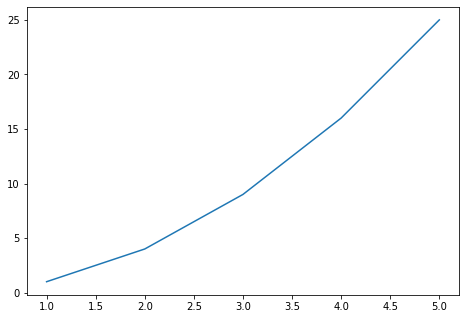

In [24]:
#Import `pyplot`
import matplotlib.pyplot as plt

# 第 1 步，Initialize a Figure 
fig = plt.figure()

# 第 2 步，Add Axes to the Figure
ax=fig.add_axes([0,0,1,1])

# 第 3 步，plot on the Axes object
x=[1,2,3,4,5]
y=[1,4,9,16,25]
ax.plot(x,y) # 只有 Axes 对象上才有 plot 方法

另一种是采用 `subplot` 的方法同时创建`Figure`和相应的`Axes`对象。
+ `add_subplot()`函数（注意，**不是复数形式**）有三个参数，都是整数，分别表示**行数**，**列数**，**子图标号** 。  
比如`add_subplot(1,1,1)`表示子图排列是 1行 X 1列，现在控制的是第 1 号子图，通常简写为`add_subplot(111)`。
+ 使用`add_subplot()`函数时，可以省略`add_axes()`这一步，因为前者会默认做这件事。  
这两者不完全一样——虽然两者返回的都是`Axes`对象：
  + `add_axes()`的参数（一个list）指定的是：左下角位置，width，height，它使用的是绝对坐标系，**位置设置更加精细**；
  + `add_subplot()`它只能指定大致的位置（用标号表示），不能设置更加精细的 position。

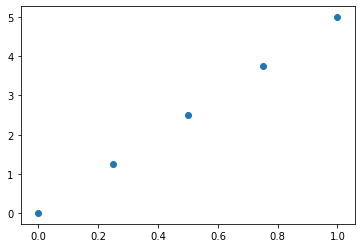

In [26]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np

# Create a Figure
fig = plt.figure()

# Set up Axes，注意这里并没有创建 Axes 对象，因为add_subplots（）函数会默认做这件事。
ax = fig.add_subplot(111)

# Scatter the data
ax.scatter(np.linspace(0, 1, 5), np.linspace(0, 5, 5))

# Show the plot
plt.show()

## 绘制图形的四种代码风格

+ 下面这 4 种绘图风格，由上至下，越来越接近最底层的语法，第三种和第四种基本是一样的，第一种是最简单的，第二种折中。  
  之所以会有这种情况，是因为前两种是出于快速作图的需要，后两种是遵循了python的哲学：“Explicit is better than implicit”。
  
  
```python
#creating the arrays for testing
x = np.arange(1, 100)
y = np.sqrt(x)

#第一种
plt.plot(x, y)

#第二种
ax = plt.subplot()
ax.plot(x, y)

#第三种 ——— 推荐使用
fig1 = plt.figure()
new_plot = fig1.add_subplot(111)
new_plot.plot(x, y)

#第四种
fig2=plt.figure()
new_axes=fig2.add_axes([0,0,1,1])
new_axes.plot(x,y)

#各个对象的类型
In [15]: type(ax)
Out[15]: matplotlib.axes._subplots.AxesSubplot

In [16]: type(new_plot)
Out[16]: matplotlib.axes._subplots.AxesSubplot

In [17]: type(new_axex)
Out[17]: matplotlib.axes._axes.Axes
```

+ 总结，**使用面向对象风格创建图形常用的几个函数如下**
  + `ax = fig.add_subplot()` —— 最为推荐
  + `fig, axes = plt.subplots()`
  + `ax = plt.subplot()`

## 绘图中需要注意的一些地方

+ **matplotlib** 所使用的数据格式最好是`np.array`或者`np.ma.masked_array`,实际上，所有传递进来的数据都是要转换成`np.array`格式的。

+ 以下的一些函数需要注意：
  + `plt.subplot()`：返回的是**单个子图**的`aexs`，所以是单数。——**可以不带参数**   
  注意，**它不返回`figure`对象**，它只是增加一个subplot，所以不能进行图形大小之类的设置。
  + `plt.subplots()`：返回**一个**`figure`和**一系列**的`subplots`的矩阵。  
  它是创建`figure`时增加subplot，**可以通过`figsize=(15,8)`等参数控制`figure`的大小**。——**必须带参数**  
  + `plt.axes()`：向当前的figure中添加一个`axes`，如果没有figure，先创建一个。——**可以不带参数**
    
 上面这3个函数都是直接跳过了创建figure的这一步。
  

+ 下面这两个函数必须要先创建一个`figure`对象
  + `fig.add_subplot()`  ：向已有的figure对象`fig`中添加**一个**`AxesSubplot`
  + `fig.add_axes()`： 向已有的figure对象`fig`中添加**一个**`Axes`
  
 并且，这两个函数必须**要带参数**，否则返回的就是空对象，不能进行绘图。
 

    
```python
// 不指定参数
In [23]: ax=fig.add_subplot()
In [24]: type(ax)
Out[24]: NoneType          //返回的是空对象，也就不能使用.plot()方法

// 指定参数才能创建图形
In [25]: ax=fig.add_subplot(111)
In [26]: type(ax)
Out[26]: matplotlib.axes._subplots.AxesSubplot

// 不带参数
In [29]: axs=fig.add_axes()  
In [30]: type(axs)
Out[30]: NoneType           // 空对象
    
// 指定参数才行
In [31]: axs=fig.add_axes([0,0,1,1])
In [32]: type(axs)
Out[32]: matplotlib.axes._axes.Axes
```

+ 对于`fig.add_subplot()` 和 `plt.subplots()`：

```python
fig=plt.figure()
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

# 上面等价于
fig, ax = plt.subplots(2,2)
# 其中`ax`是一个 4x4 的矩阵，每一个元素是一个 axes 对象，可以通过 ax[0,0], ax[0,1] 访问。

```



----

# Matplotlib基本绘图

一幅完整的图形必须包括如下部分
1. 图形本身
2. 图标题
3. 图例
4. 横纵坐标名称
5. 横纵坐标刻度

+ 数据集

In [39]:
import seaborn as sns
iris = sns.load_dataset('iris')
print("iris.shape: ", iris.shape)
iris.head()

iris.shape:  (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 散点图和线图

使用 [**matplotlib.axes.Axes.plot**](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) 来绘制点图和线图.  
这里有必要看一下这个函数的参数形式和函数签名：  
`Axes.plot(self, *args, scalex=True, scaley=True, data=None, **kwargs)` .  
```python
# Call signatures::
plot([x], y, [fmt], *, data=None, **kwargs)
plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
```
其中绘图的点坐标参数`[x]`, `y` 以及格式控制参数`fmt`都是以 `*args` 方式传入的，这意味着**它们不能采用`x=data1`,`y=data2`这种键值对形式输入参数！！！**  

下面是一些参数的含义：  

+ `fmt`，Format String，用于设置color，marker和line。  
设置的格式顺序是`'[marker][line][color]'`，其中每一个子项都是可选的。
  + marker 可以设置为 `.`（普通的点），`o`（实心圆点），`*`（星号点）等等，具体见文档；
  + line 可以设置为 `-`（实体线），`--`（虚线），`-.`（dash-dot线）和 `:`（dotted line）这四种；
  + color 可以设置为 `b`(blue), `g`(green), `r`(red), `c`(cyran), `y`(yellow), `k`(black), `w`(white) 和 `m`(magenta)。
  
  
+ `**kwargs`，这部分是**键值对的参数——传参时必须使用`key=value`的形式**，用于控制其他属性。  
常见的一些属性有：
  + `alpha`
  + `label`, 此绘图数据的名称，默认下作为图例名称显示
  + `linestyle`
  + `linewidth`
  + `marker`
  + `markersize`
  + `color`

+ 点图

Text(0, 0.5, 'sepat_width')

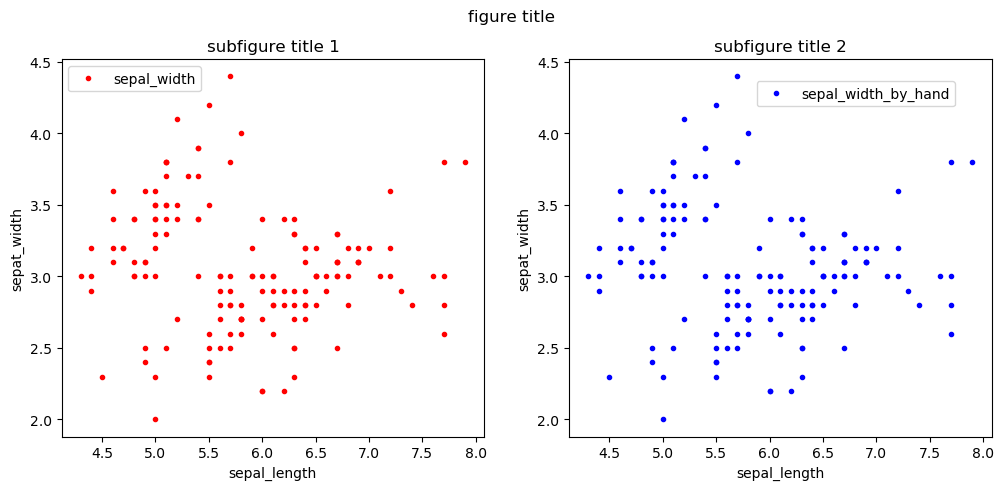

In [100]:
# 1. 图形本身
fig = plt.figure(figsize=(12,5), dpi=100)  # figsize=(width, height)，单位 inche; dpi默认为100

ax1 = fig.add_subplot(121)
ax1.plot(iris['sepal_length'], iris['sepal_width'], 'or', label='sepal_width', markersize=3)

ax2 = fig.add_subplot(122)
ax2.plot('sepal_length','sepal_width','.b', data=iris)   # 传入data后，可以直接用data里列名称指定绘图坐标点

# 2. 图标题
fig.suptitle('figure title') # 整个图的标题
ax1.set_title('subfigure title 1') # 每个Axes的标题
ax2.set_title('subfigure title 2')

# 3. 图例
ax1.legend(loc='upper left')  # 默认会使用 ax.plot() 里的label作为图例， loc 指定位置
ax2.legend(labels=['sepal_width_by_hand'], bbox_to_anchor=(0.93,0.96) ) 

# 4. 横纵坐标名称
ax1.set_xlabel('sepal_length')
ax1.set_ylabel('sepat_width')
ax2.set_xlabel('sepal_length')
ax2.set_ylabel('sepat_width')

# 5. 横纵坐标刻度——略，这里自动创建好了


+ 线图

[Text(0.5, 0, 'x'), Text(0, 0.5, '$x^3$')]

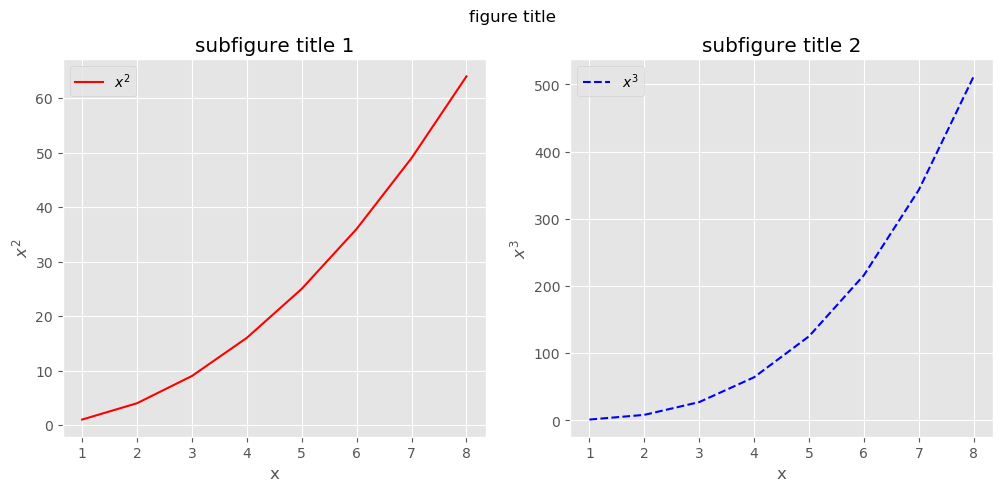

In [268]:
import numpy as np
x = np.arange(1,9)
y1 = x**2
y2 = x**3

# 1. 图形本身
fig = plt.figure(figsize=(12,5), dpi=100)  # figsize=(width, height)，单位 inche; dpi默认为100
ax1 = fig.add_subplot(121)
ax1.plot(x, y1, '-r')
ax2 = fig.add_subplot(122)
ax2.plot(x,y2,'--b') 

# 2. 图表题
fig.suptitle('figure title')
ax1.set_title('subfigure title 1')
ax2.set_title('subfigure title 2')

# 3. 图例
ax1.legend(labels=['$x^2$'])
ax2.legend(labels=['$x^3$'])

# 4. 坐标名称
ax1.update({'xlabel':'x', 'ylabel':'$x^2$'})
ax2.update({'xlabel':'x', 'ylabel':'$x^3$'})

# 5. 坐标轴刻度——自动生成

+ [**matplotlib.axes.Axes.scatter()**](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)  
这个也是绘制散点图的函数，它比`plot()`方法更加强大，**可以绘制点的大小和颜色可变化**的散点图。  
参数有：
  + `s`，映射点的大小属性，float or **array-like, shape (n, )**
  + `c`，映射点的颜色属性，array-like or list of colors or color. 有下面四种指定方式：
    + 单独的颜色字符串
    + A sequence of colors of length n
    + A 2-D array in which the rows are RGB or RGBA
    + **A scalar or sequence of n numbers to be mapped to colors using cmap and norm**.
  + `cmap`，指定使用的colormap，可以是已有的colormap的名称，或者是一个`Colormap`对象. —— 必须搭配参数 `c` 使用
  + `norm`，指定搭配colormap的normalize方式，是一个`Normalize`对象，默认为`colors.Normalize`. —— 必须搭配参数 `c` 使用
  
相比于`plot()`，`scatter`提供了对于colormap的控制，而`plot`不行。

[Text(0.5, 0, 'sepal_length'), Text(0, 0.5, 'sepal_width')]

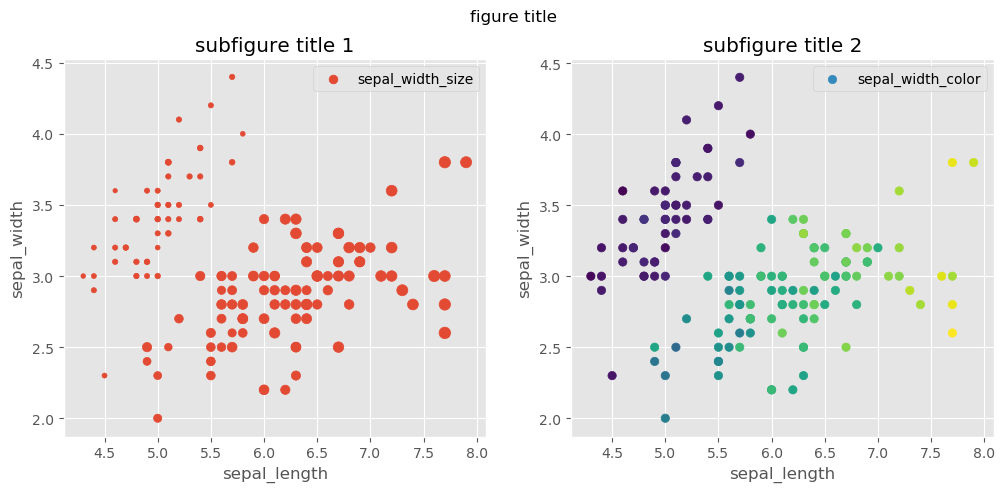

In [269]:
fig = plt.figure(figsize=(12,5), dpi=100) 
ax1 = fig.add_subplot(121)
ax1.scatter(iris['sepal_length'], iris['sepal_width'], label='sepal_width', s=10*iris['petal_length'])

ax2 = fig.add_subplot(122)
ax2.scatter(iris['sepal_length'], iris['sepal_width'], label='sepal_width',  c=iris['petal_length'])   

fig.suptitle('figure title')
ax1.set_title('subfigure title 1') 
ax2.set_title('subfigure title 2')

ax1.legend(labels=['sepal_width_size'])  
ax2.legend(labels=['sepal_width_color']) 

ax1.update({'xlabel':'sepal_length', 'ylabel':'sepal_width'})
ax2.update({'xlabel':'sepal_length', 'ylabel':'sepal_width'})

---

## 条形图(Bar Plot)
 
用于展示 **一维`离散`变量** 的频数分布，横坐标通常是分类变量， 纵坐标是该取值下的频数。

两个函数：
+ `Axes.bar(self, x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)` —— 竖直条形图
  + `x`，条形图的横坐标，loat or array-like， 可以是字符串组成的list;
  + `height`，条形图的高度;
  + `bottom`，用于指定每个条形图底部的base。
+ `Axes.barh(self, y, width, height=0.8, left=None, *, align='center', **kwargs)` —— 水平条形图
  + `y`，条形图的纵坐标
  + `width`，条形图的“高度”，**相当于竖直条形图中的`height`**（同样的，这里的height相当于竖直条形图里的width）
  + `left`，相当于竖直条形图中的`bottom`
  
此外，还有`pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)`也可以绘制。

[Text(0.5, 0, 'width'), Text(0, 0.5, 'category')]

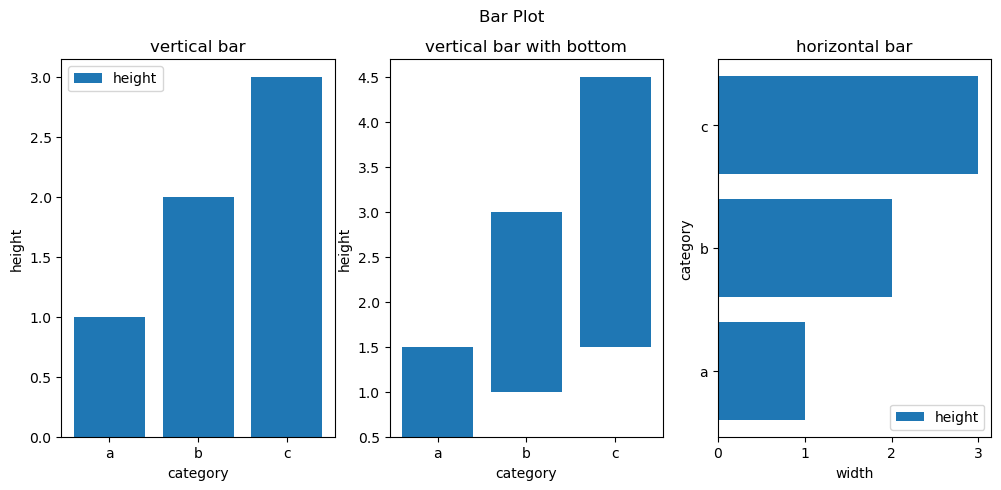

In [121]:
fig = plt.figure(figsize=(12,5), dpi=100) 
ax1 = fig.add_subplot(131)
ax1.bar(x=['a','b','c'], height=[1,2,3])

ax2 = fig.add_subplot(132)
ax2.bar(x=['a','b','c'], height=[1,2,3], bottom=[0.5, 1, 1.5])

ax3 = fig.add_subplot(133)
ax3.barh( y=['a','b','c'], width=[1,2,3])  

fig.suptitle('Bar Plot')
ax1.set_title('vertical bar') 
ax2.set_title('vertical bar with bottom')
ax3.set_title('horizontal bar')

ax1.legend(labels=['height'])  
ax3.legend(labels=['height']) 

ax1.update({'xlabel':'category', 'ylabel':'height'})
ax2.update({'xlabel':'category', 'ylabel':'height'})
ax3.update({'xlabel':'width', 'ylabel':'category'})

+ 分组条形图  
这个绘制起来不需要额外的参数，就是手动设置两个条形图底部的横坐标而已。

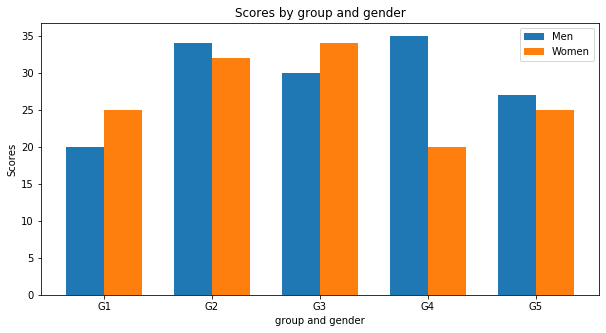

In [120]:
# 条形图的分类变量
category = ['G1', 'G2', 'G3', 'G4', 'G5']
# 将分类变量转换成数值
x = np.arange(len(category))
# 需要绘制的两组数值
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
# the width of the bars
width = 0.35  

fig, ax = plt.subplots(figsize=(10,5))
# 第一组，往左移 1/2*width
ax.bar(x - width/2, men_means, width, label='Men')
# 第二组，往右移 1/2*width
ax.bar(x + width/2, women_means, width, label='Women')

# 增加一些标注，特别是横坐标
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xlabel('group and gender')
ax.set_xticks(x)
ax.set_xticklabels(category)
ax.legend()

+ 堆叠条形图和带误差的条形图
  + 绘制堆叠条形图时，需要设置`bottom`参数，将它**设为下一层条形图的base起点即可**
  + 绘制带误差的条形图时，需要设置`yerr`参数，它里面的值对应于每一个条形图的误差值。
  比如`yerr=[0.5,1]`，表示第一个条形图的误差范围为+、- 0.5，第二个为+、-1。

[Text(0.5, 0, 'category'), Text(0, 0.5, 'count')]

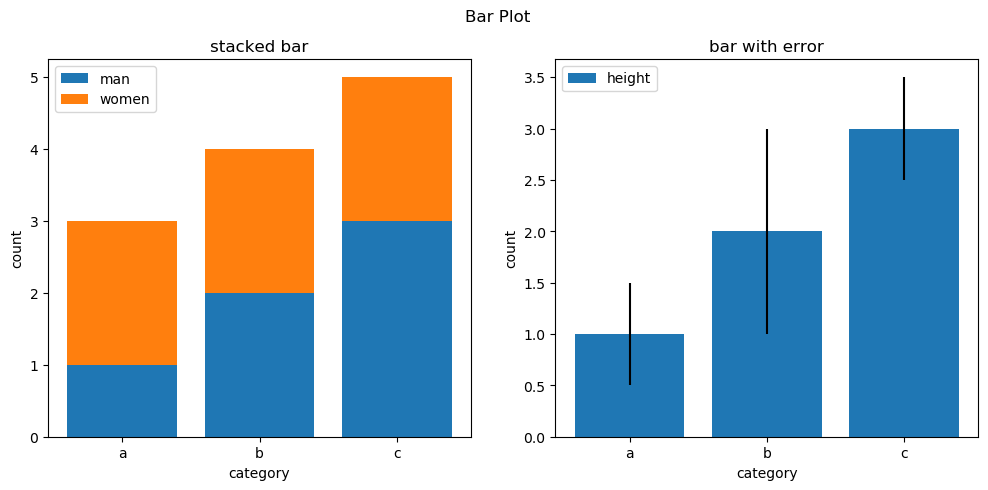

In [116]:
fig = plt.figure(figsize=(12,5), dpi=100) 
ax1 = fig.add_subplot(121)
ax1.bar(x=['a','b','c'], height=[1,2,3], label='man')
ax1.bar(x=['a','b','c'], height=[2,2,2], bottom = [1,2,3], label='women') # 第二层的条形图的 bottom 设置为第一层的值

ax2 = fig.add_subplot(122)
ax2.bar(x=['a','b','c'], height=[1,2,3], yerr=[0.5,1,0.5]) # yerr 设置误差，

fig.suptitle('Bar Plot')
ax1.set_title('stacked bar') 
ax2.set_title('bar with error')

ax1.legend()  
ax2.legend(labels=['height'], loc='upper left') 

ax1.update({'xlabel':'category', 'ylabel':'count'})
ax2.update({'xlabel':'category', 'ylabel':'count'})

## 直方图（Histogram）

用于展示**一维`连续`变量**的**密度分布**，它本质上是对**密度函数**的一种估计。  
基本思想：**划分区间并计数有多少数据点落入该区间** ——在 X 轴上将值域分割为一定数量的组，在Y 轴上显示相应值的频数，展示了**连续型变量**的分布。

直方图分为：
1. **频数**（Frequency）分布直方图；
2. **频率**（Density）分布直方图——也就是真正的密度图，这个图形可以添加密度曲线。

绘图函数:`Axes.hist(self, x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)` .    
详细见matplotlib文档 [Some features of the histogram (hist) function](https://matplotlib.org/gallery/statistics/histogram_features.html).

参数：
+ `x`，要绘制的一维连续数据
+ `bins`，有3种指定方式：
  + 整数，指定分割的bin的数量
  + sequence，指定分割点
  + string，可以取'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', or 'sqrt'等分割方式。
+ `density`，bool值, default: False。是否绘制 频率分布直方图.
+ `cumulative`，布尔值，默认False，是否绘制累积分布
+ `orientation`，{'vertical', 'horizontal'}，default: 'vertical'
+ `stacked`，bool，default: False

返回值：
+ `n`，array or list of arrays，直方图每个分箱里的数值
+ `bins`，array，每个箱子的边界点
+ `pathces`，不用管

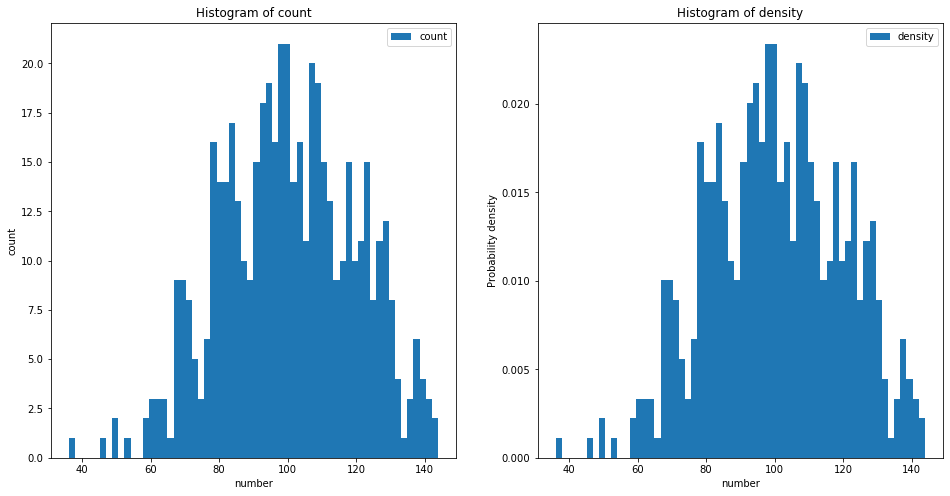

In [142]:
import numpy as np
rng = np.random.RandomState(20)
mu = 100
sigma = 20  # standard deviation of distribution
x = mu + sigma * rng.randn(500)
# 分箱个数
bin_num = 60

fig = plt.figure( figsize=(16,8))
ax1 = fig.add_subplot(121)
n, bins, patches = ax1.hist(x, bins=bin_num, density=False, label='count')
ax2 = fig.add_subplot(122)
n, bins, patches = ax2.hist(x, bins=bin_num, density=True, label='density')

ax1.set_title("Histogram of count")
ax1.update({'xlabel':'number','ylabel':'count'})
ax1.legend()
ax2.set_title("Histogram of density")
ax2.update({'xlabel':'number','ylabel':'Probability density'})
ax2.legend()

+ 二维直方图  
`Axes.hist2d(self, x, y, bins=10, range=None, density=False, weights=None, cmin=None, cmax=None, *, data=None, **kwargs)`


## 箱线图  

箱线图（Box Plot或Box-and-Whisker Plot）主要是从**四分位数**的角度出发描述数据的分布，它通过如下五处位置来获取**一维`连续`数据**的分布概况：
1. 最大值（Q4）
2. 上四分位数（Q3）
3. 中位数（Q2）
4. 下四分位数（Q1）
5. 最小值（Q0）

这五处位置之间依次包含了四段数据，每段中数据量均为总数据量的1/4。通过每一段数据占据的长度，我们可以大致推断出数据的集中或离散趋势。

`Axes.boxplot(self, x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)`
详见[官方文档](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot).

常用参数：
+ `x`，输入的数据，Array or a sequence of vectors.
  + 如果是单个的array，那就绘制一个箱线图
  + 如果是 sequence of vectors，有多少条 sequence，就绘制多少个箱线图
+ `notch`，bool, default: False，是否是凹口的形式展现箱线图，默认非凹口
+ `sym`，指定异常点的形状，默认为+号显示
+ `vert`，bool, default: True
+ `whis`，指定上下须与上下四分位的距离，默认为1.5倍的四分位差
+ `labels`：为箱线图添加标签，类似于图例的作用

调整显示内容的一些参数
+ `meanline`：是否用线的形式表示均值，默认不显示
+ `showmeans`：是否显示均值，默认不显示
+ `showcaps`：是否显示箱线图顶端和末端的两条线，默认显示
+ `showbox`：是否显示箱线图的箱体，默认显示
+ `showfliers`：是否显示异常值，默认显示
+ `boxprops`：设置箱体的属性，如边框色，填充色等
+ `flierprops`：设置异常值的属性，如异常点的形状、大小、填充色等
+ `medianprops`：设置中位数的属性，如线的类型、粗细等
+ `meanprops`：设置均值的属性，如点的大小、颜色等
+ `capprops`：设置箱线图顶端和末端线条的属性，如颜色、粗细等
+ `whiskerprops`：设置须的属性，如颜色、粗细、线的类型等

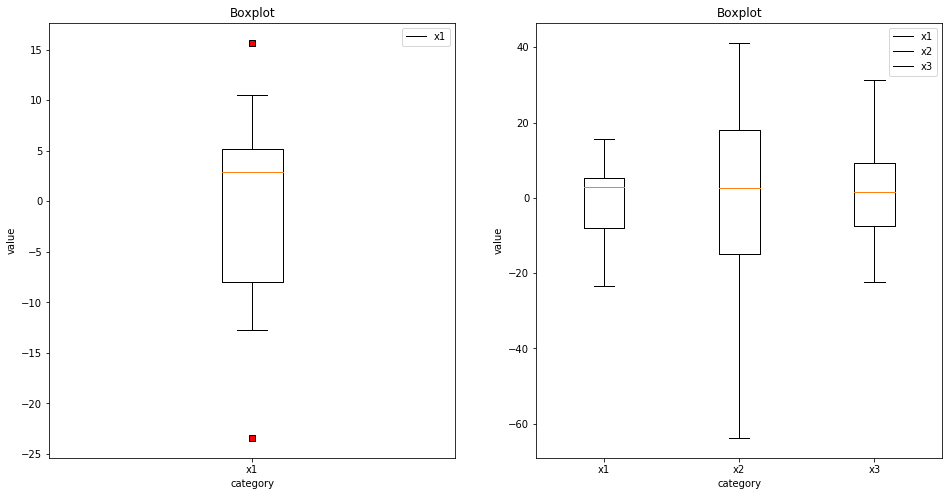

In [169]:
import numpy as np
rng = np.random.RandomState(20)
# 生成三个正态分布的随机数序列
x1 = rng.randn(20)*10
x2 = rng.randn(35)*20
x3 = rng.randn(30)*15
x = [x1,x2,x3]

fig = plt.figure( figsize=(16,8))
ax1 = fig.add_subplot(121)
res = ax1.boxplot(x1, labels=['x1'],  whis=0.5, meanline=True, flierprops=dict(markerfacecolor='r', marker='s') )
ax2 = fig.add_subplot(122)
res = ax2.boxplot(x, labels=['x1','x2','x3'])

ax1.set_title("Boxplot")
ax1.update({'xlabel':'category','ylabel':'value'})
ax1.legend(['x1'])
ax2.set_title("Boxplot")
ax2.update({'xlabel':'category','ylabel':'value'})
ax2.legend(['x1','x2','x3'])

## 小提琴图  

小提琴图是箱线图与核密度图的结合，核密度图以镜像方式在箱线图上的叠加，适用于**一维`连续`变量**的分布可视化。

`Axes.violinplot(self, dataset, positions=None, vert=True, widths=0.5, showmeans=False, showextrema=True, showmedians=False, quantiles=None, points=100, bw_method=None, *, data=None)`  

参数：
+ `dataset`，Array or a sequence of vectors。和箱线图一样，每一列都会绘制一个图形。
+ `positions`，设置每个图形的位置
+ `vert`，bool, default: True
+ 其他的一些参数和箱线图类似。

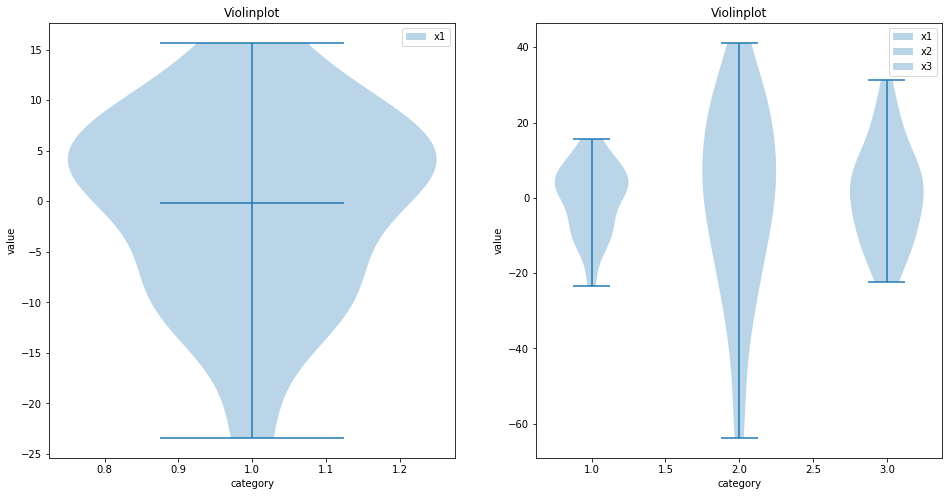

In [168]:
import numpy as np
rng = np.random.RandomState(20)
# 生成三个正态分布的随机数序列
x1 = rng.randn(20)*10
x2 = rng.randn(35)*20
x3 = rng.randn(30)*15
x = [x1,x2,x3]

fig = plt.figure( figsize=(16,8))
ax1 = fig.add_subplot(121)
res = ax1.violinplot(x1, showmeans=True)
ax2 = fig.add_subplot(122)
res = ax2.violinplot(x)

ax1.set_title("Violinplot")
ax1.update({'xlabel':'category','ylabel':'value'})
ax1.legend(['x1'])
ax2.set_title("Violinplot")
ax2.update({'xlabel':'category','ylabel':'value'})
ax2.legend(['x1','x2','x3'])

## 热力图

matplotlib中绘制热力图使用的函数同时也是显示图片使用的函数.  
`Axes.imshow(self, X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)`.  
  

常用参数：
+ `X`，array-like or PIL image，支持下面三种格式：  
前两个维度 M 和 N 决定了图形的行数与列数.
  + (M, N): an image with scalar data. **The values are mapped to colors using normalization and a colormap**. See parameters norm, cmap, vmin, vmax.
  + (M, N, 3): an image with RGB values (0-1 float or 0-255 int).
  + (M, N, 4): an image with RGBA values (0-1 float or 0-255 int), i.e. including transparency.
+ `cmap`，使用的colormap. 可以是 str 或者 Colormap 对象. 默认为`rcParams["image.cmap"]`，也就是`'viridis'` .    
可用的cmap名称及其样式见文档 [Colormap reference](https://matplotlib.org/gallery/color/colormap_reference.html).
+ `norm`，配合`cmap`使用的`Normalize`对象.

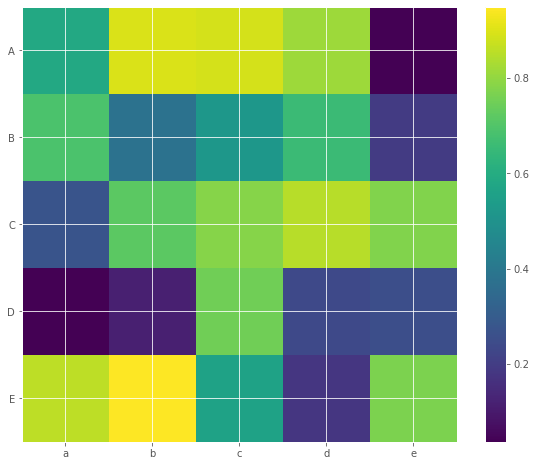

In [205]:
import numpy as np
rng = np.random.RandomState(20)
# 生成正态分布的矩阵
x = rng.rand(5,5)
x_labels = ['a','b','c','d','e']
y_labels = ['A','B','C','D','E']

fig = plt.figure( figsize=(10,8))
ax = fig.add_subplot(111)
headmap = ax.imshow(x)
# 设置坐标显示的类别
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
# 右侧增加颜色条
fig.colorbar(headmap)

## 等高线图  

有两个函数：
+ `Axes.contour(self, *args, data=None, **kwargs)` —— 绘制等高线
```python
#Call signature:
contour([X, Y,] Z, [levels], **kwargs)
```

+ `Axes.contourf(self, *args, data=None, **kwargs)` —— 绘制等高线，并**在等高线之间插值填充颜色**，这个好看一些.
```python
#Call signature:
contourf([X, Y,] Z, [levels], **kwargs)
```

必备参数：  
注意，下面这几个参数都是**非关键词**参数，传参的时候不能使用`key=value`形式。
+ `X, Y`，array-like, optional，Z值的横纵坐标。
+ `Z`，array-like(N, M)，高度值
+ `levels`，int or array-like, optional，用于指定绘制的等高线条数
  + int时，表示绘制多少条等高线
  + array-like时，表示绘制指定高度的等高线


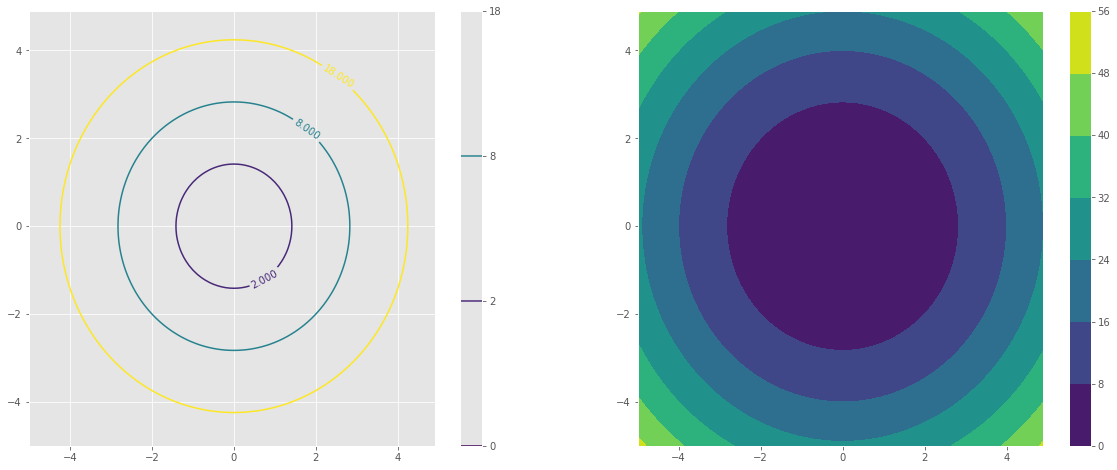

In [211]:
import numpy as np
step = 0.1
x = np.arange(-5.0, 5.0, step)
y = np.arange(-5.0, 5.0, step)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
# 指定绘制特定高度的等高线
levels = [0, 2, 8, 18]

fig = plt.figure( figsize=(20,8))
ax1 = fig.add_subplot(121)
cs1 = ax1.contour(X,Y,Z, levels)
ax2 = fig.add_subplot(122)
cs2 = ax2.contourf(X,Y,Z)

# 等高线上增加刻度
ax1.clabel(cs1, inline=True)

# 右侧 分别 增加 colorbar
fig.colorbar(cs1, ax=ax1)
fig.colorbar(cs2, ax=ax2)

## 饼图

---

# 绘图属性和风格设置  

由于大部分的绘图功能都在`Axes`对象中，所以下面大部分的图形属性控制都可以在 `matplotlib.axes` 的[API文档](https://matplotlib.org/api/axes_api.html)中找到设置方式。

## 图标题

图的标题有两个地方可以设置：
1. [**matplotlib.figure.Figure**](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) 对象的`suptitle()`方法.  
它设置的是整个Figure的标题.
2. [**matplotlib.axes.Axes**](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title) 对象的`set_title()`方法.  
它设置的是Figure内每个Axes的标题.

## 图例(legend)

有两个类含有`legend()`函数
+ [**matplotlib.pyplot.legend()**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend)
+ [**matplotlib.axes.Axes.legend()**](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.legend.html#matplotlib.axes.Axes.legend)  

注意，虽然matplotlib还有一个子模块 [matplotlib.legend](https://matplotlib.org/api/legend_api.html)，但是通常不会直接调用这个类去设置legend.

`legend()`函数的参数和签名为：  
`legend(self, *args, **kwargs)`
```python
# Call signatures:
legend()
legend(labels)
legend(handles, labels)
```

+ `labels`，设置的legend名称，注意，它是**`list of str`**，所以必须要用`labels=['legend_1']`这种形式，不能使用`labels='lengend_1'`.

+ `**kwargs`包括的常用参数有：
  + `loc`，指定大致的位置
  + `bbox_to_anchor`，使用坐标更加精细的指定位置

## 坐标轴调整

+ 设置坐标轴名称
  + 可以使用 `matplotlib.axes.Axes` 对象的 `.set_xlabel()` 和 `.set_ylabel()` 方法设置。  
  + 也可以使用 `.update({'xlabel':'x', 'ylabel':'y', 'zlabel':'z'})` 一次性完成设置。
  
  
+ 设置坐标轴刻度位置
  + `Axes.set_xticks(self, ticks, *, minor=False)`
  + `Axes.set_yticks(self, ticks, *, minor=False)`


+ 设置坐标轴刻度名称
  + `Axes.set_xticklabels(self, labels, *, fontdict=None, minor=False, **kwargs)`
  + `Axes.set_yticklabels(self, labels, *, fontdict=None, minor=False, **kwargs)`
  

+ 设置坐标轴范围
  + `Axes.set_xlim(self, left=None, right=None, emit=True, auto=False, *, xmin=None, xmax=None)`
  + `Axes.set_ylim(self, left=None, right=None, emit=True, auto=False, *, xmin=None, xmax=None)`
  
  
+ 设置坐标轴缩放尺度
  + `Axes.set_xscale(self, value, **kwargs)`
  + `Axes.set_yscale(self, value, **kwargs)`



## 文字标注  

matplotlib中的文字标注详细指南见官方文档 [Annotations](https://matplotlib.org/3.1.1/tutorials/text/annotations.html).

注意，下面的函数**每次只能对一个点进行标注文字**.如果要标注多个点，需要使用循环处理.

+ 给`Axes`对象添加文字标注  
`Axes.text(self, x, y, s, fontdict=None, **kwargs)`
参数：
  + `x`,`y`，文字标注所在的位置
  + `s`，添加的文字
  + `fontdict`，用于控制文字外观属性的字典


+ 绘制箭头  
`Axes.arrow(self, x, y, dx, dy, **kwargs)`  
绘制一个从 $(x,y)$ 指向 $(x+dx, y+dy)$ 处的箭头.
  + `x`,`y`，起始坐标点
  + `dx`,`dy`，箭头长度
  + `width`，宽度，默认只有0.001.
  + `shape`: `['full', 'left', 'right']`, default: 'full'


+ 给图形中**特定点**做文字标注  
`Axes.annotate(self, text, xy, *args, **kwargs)`
参数：
  + `text`，添加的文字
  + `xy`，(float, float)的tuple，被标注的点位置
  + `xytext`，(float, float)的tuple，**放置标注文字的位置**，这个参数不写的话，默认为`xy`
  + `xycoords`，坐标系设置，默认是数据的坐标系
  + `textcoords`，文字标注位置的坐标系
  + `arrowprops`，dict, optional. 用于绘制一个从 xytext 指向 xy 的箭头，控制箭头的属性。**默认情况下，不绘制箭头**.
  
  

+ `arrowprops`的说明，它是一个dict，可以接受如下的key  
  + arrowstyle，设置箭头的风格，有如下值：
    + '->', '<-', '<->'
    + '-|>', '<|-', '<|-|>'
    + 'fancy', 'simple', 'wedge'
  + width
  + shrink
  
  注意，设置了arrowstyle之后，就不能再使用下面的width等参数了.



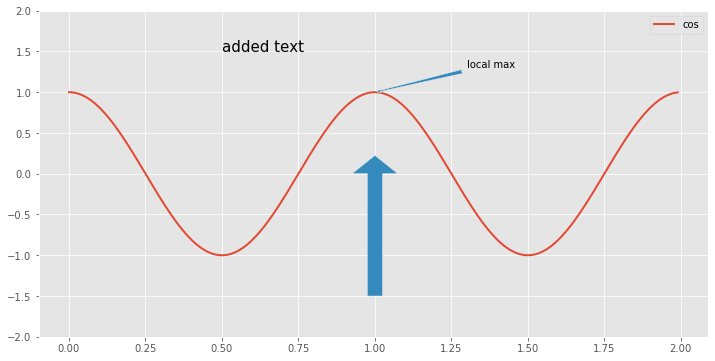

In [241]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(12,6))
t = np.arange(0.0, 2.0, 0.01)
s = np.cos(2*np.pi*t)
ax.plot(t, s, lw=2, label='cos')

ax.annotate('local max', xy=(1, 1), xytext=(1.3, 1.3),  arrowprops=dict(arrowstyle='fancy'))
ax.text(0.5, 1.5, 'added text', fontdict=dict(fontsize=15))
ax.arrow(1,-1.5, 0, 1.5, width=0.05)
ax.set_ylim(-2, 2)
ax.legend()

## ColorMap设置-KEY

colormap指的是将$[0,1]$之间的数值映射到自然界颜色的一个规则（通常是将$[0,1]$映射到对应的RGB值），不同的colormap会产生不同的映射风格。  

matplotlib中有关colormap的介绍主要有三个文档：
1. [**Choosing Colormaps in Matplotlib**](https://matplotlib.org/tutorials/colors/colormaps.html)  
介绍了matplotlib里colormap的类型以及具体的颜色变化（这个比较有用）.
2. [**Creating Colormaps in Matplotlib**](https://matplotlib.org/tutorials/colors/colormap-manipulation.html)  
介绍了如何创建自己的colormap（没啥用）.
3. [**Colormap reference**](https://matplotlib.org/gallery/color/colormap_reference.html)  
这个绘制出了不同colormap的具体样子（在 文档1 中也有这些图）.

但是上面的三个官方文档都没有说明具体怎么使用colormap，倒是这篇博客 [Matplotlib配色之Colormap详解](https://www.pythonf.cn/read/81780) 介绍了colormap的使用。

matplotlib中：
+ [`matplotlib.colors`](https://matplotlib.org/api/colors_api.html) 负责**将数值或者颜色参数转成具体的 RGB或RGBA值**（converting numbers or color arguments to RGB or RGBA）.
+ [`matplotlib.cm`](https://matplotlib.org/api/cm_api.html) 提供了对colormap对象的封装，它需要`matplotlib.colors`模块的支持.

colormap实现的是从数据到颜色的映射，这需要两个过程：
1. matplotlib用$[0, 1]$区间的浮点数表示颜色RGB值，首先需要将不同的变量值映射到$[0, 1]$区间——这个过程被称为Normalize；
2. 将$[0, 1]$区间的变量值映射到具体的颜色.

`matplotlib.colors`模块负责实现上述两个功能，
1. 实现第一个功能的是`Normalize`及其子类
  + `Normalize([vmin, vmax, clip])`，linearly normalizes data into the [0.0, 1.0] interval——这个最重要.
  + `BoundaryNorm(boundaries, ncolors[, clip, extend])`，Generate a colormap index based on discrete intervals.
  + `LogNorm([vmin, vmax, clip])`，Normalize a given value to the 0-1 range on a log scale
2. 实现第二个功能的是`Colormap`及其子类，一般有如下两种
  + `ListedColormap(colors[, name, N])`，从给定的颜色列表中创建一个映射
  + `LinearSegmentedColormap(name, segmentdata[, ...])` ——这个太复杂了，但是可以比上一个类提供更加精细的颜色映射.
  
`matplotlib.cm` 模块实现了对上述两个步骤的封装，它里面有一个类：  
`class matplotlib.cm.ScalarMappable(norm=None, cmap=None)`  
其中的参数`norm`和`cmap`分别就是上述的`Normalize`对象和`Colormap`对象——这样得到的`ScalarMappable`对象，可以**一口气完成 data -> [0,1]区间 -> RGB或RGBA值 的转换**。
  

下面简单介绍一下两个步骤中`matplotlib.colors`里一些类的用法。
+ `Normalize.__init__([vmin, vmax, clip])`  
`vmin`,`vmax`是需要normalize的区间端点，用这两个参数初始化一个`Normalize`对象`norm`之后，就可以使用`norm(value)`的形式，将$[vmin, vmax]$之间的value转换成$[0,1]$之间的数.

+ `BoundaryNorm.__init__(boundaries, ncolors, clip=False, *, extend='neither')`


+ `ListedColormap.__init__(colors, name='from_list', N=None)`——这是类的初始化方式
  + `colors`，有两种方式指定：
    + list of str， 比如 `['r','g','b']` 这种方式，表示将[0,1]区间分成三段，分别映射到r, g, b三种颜色。
    + Nx3 or Nx4 floating point array (N rgb or rgba values). 比如`[[0.1,0.1,0.1],[0.5.0.5,0.5],[0.8,0.8,0.8]]`，RGB表示的三个颜色序列.
  + `name`，产生的colormap的名称.
  + `N`，int，可选，用于指定要使用的颜色个数。如果 N < len(colors)，那就只取colors中的前N个，如果 N > len(colors)，那就循环重复使用.  
  
 创建了`ListedColormap`对象之后，比如`listcolormap`，对于[0,1]之间的value，使用`listcolormap(value)`会返回对应的RGBA值。


In [263]:
from matplotlib.colors import Normalize, BoundaryNorm, LinearSegmentedColormap, ListedColormap

# 创建一个Normalize对象，归一化范围为 [0,100]
norm = Normalize(0, 100)
# 检查是否将 [0,100] 之间的数压缩到了 [0,1] 之间
print(norm(25), norm(50))

# 这个有待研究
norm = BoundaryNorm([0,30,60,100], ncolors=9)
print(norm.N)
print(norm(20), norm(25), norm(30), norm(40), norm(60), norm(75))

# 创建一个将 [0,1] 区间的数 映射到 颜色列表 ['r','g','b'] 的colormap，
listcolor = ListedColormap(colors=['r','g','b'])
# 获取colormap对象的颜色列表和颜色个数
print(listcolor.colors, listcolor.N)
# 返回 [0,1] 之间的数对应的 RGBA 表示
print(listcolor(0.1), listcolor(0.2), listcolor(0.4), listcolor(0.6), listcolor(0.7), listcolor(0.9))

0.25 0.5
4
0 0 4 4 8 8
['r', 'g', 'b'] 3
(1.0, 0.0, 0.0, 1.0) (1.0, 0.0, 0.0, 1.0) (0.0, 0.5, 0.0, 1.0) (0.0, 0.5, 0.0, 1.0) (0.0, 0.0, 1.0, 1.0) (0.0, 0.0, 1.0, 1.0)


+ 一个自定义colormap的例子

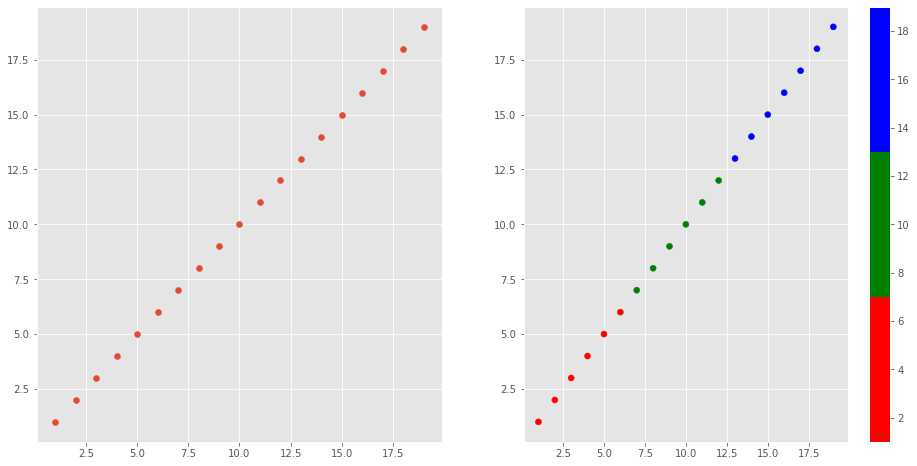

In [274]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, ListedColormap
from matplotlib import cm

import numpy as np

x = np.arange(1,20)
y = x

# 定义 y 的值域到 [0,1] 区间 的映射规则
norm = Normalize(vmin=min(y), vmax=max(y))
# 定义 [0,1] 区间到 颜色列表 的colormap
listcolor = ListedColormap(colors=['r','g','b'])

fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].scatter(x,y)
# scatter方法中，指定cmap和norm时，必须要和参数 c 搭配使用
ax[1].scatter(x,y, c=y,cmap=listcolor, norm=norm) 
# 将自定义的norm和listcolor对象封装成一个 matplotlib.cm.ScamarMappale 对象
cmsm = cm.ScalarMappable(cmap=listcolor, norm=norm)
# 添加colorbar
fig.colorbar( cmsm, ax=ax[1])

In [204]:
import matplotlib
matplotlib.cm.get_cmap()

matplotlib.colors.ListedColormap

## ColorBar配置

这部分不太好解释，不过通常colorbar会配合`plt.imshow()`或者`plt.contourf()`函数一起使用。  
可以参见官方的这个使用示例 [Colorbar](https://matplotlib.org/gallery/color/colorbar_basics.html)。

一般可以通过 `matplotlib.figure.Figure`对象的`.colorbar()`方法添加colorbar.  
`Figure.colorbar(self, mappable, cax=None, ax=None, use_gridspec=True, **kw)`
+ `mappable`，是一个`matplotlib.cm.ScalarMappable`对象。也可以传入`imshow()`或者`contourf()`返回的对象.
+ `ax`，这个参数比较有用，可以指定将colorbar添加到哪个`Axes`对象上。

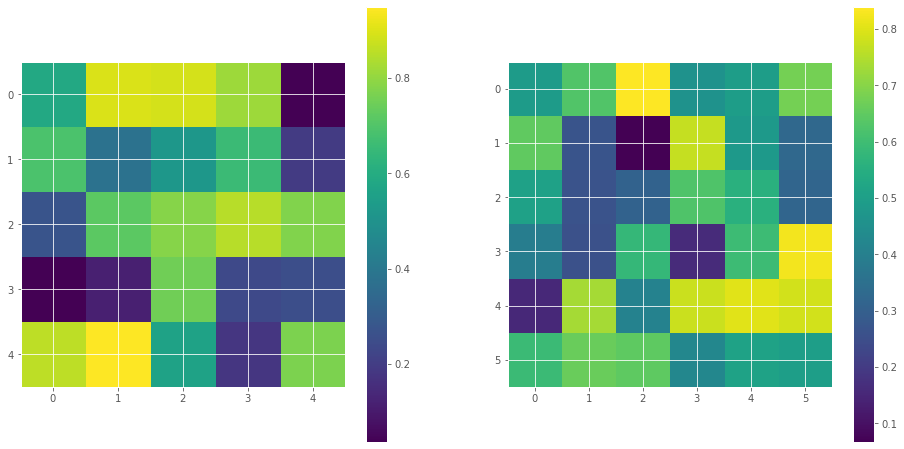

In [217]:
import numpy as np
rng = np.random.RandomState(20)
# 生成两个正态分布的矩阵
x1 = rng.rand(5,5)
x2 = rng.rand(6,6)

fig = plt.figure( figsize=(16,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
res1 = ax1.imshow(x1)
res2 = ax2.imshow(x2)

# 右侧分别增加颜色条
fig.colorbar(res1, ax=ax1)
fig.colorbar(res2, ax=ax2)

## 绘图风格设置  

有关matplotlib的详细风格设置见官方文档 [Customizing Matplotlib with style sheets and rcParams](https://matplotlib.org/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files).

+ 查看可用风格和设置风格

In [192]:
# 查看可用风格
import matplotlib.pyplot as plt
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [193]:
# 设置风格
plt.style.use('ggplot')

## Matplotlib配置文件

matplotlib的所有默认配置都写在一个叫 `matplotlibrc` 的文件中（详见官方文档 [The matplotlibrc file](https://matplotlib.org/tutorials/introductory/customizing.html#the-matplotlibrc-file)），这个配置文件通常被称为'rc settings' 或者 'rc parameters'。  
这个配置文件的存放路径见官方文档。

+ 动态修改配置文件  
所有的Rc配置都可通过一个名为 `matplotlib.rcParams` 的对象访问修改（它是`matplotlib.RcParams`类的一个实例），这个对象可以用类似于字典的方式访问修改相应的配置。

In [199]:
import matplotlib as mpl
print(mpl.rcParams['backend'])
print(mpl.rcParams['lines.linewidth'])
print(mpl.rcParams['figure.figsize'])

module://ipykernel.pylab.backend_inline
1.5
[6.0, 4.0]
